In [1]:
import requests
import pandas as pd
import json
from bokeh.plotting import figure, output_notebook, show, save, output_file
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
r = requests.get('https://www.openhumans.org/api/public-data/?source=fitbit')

In [3]:
with open('fitbit-data-2.json') as json_data:        #open the downloaded json file
    fit_data_0 = json.load(json_data)
    

In [4]:
fit_data_0.keys()

dict_keys(['profile', 'tracker-calories', 'tracker-activity-calories', 'heart', 'sleep-efficiency', 'awake-minutes', 'tracker-minutes-lightly-active', 'tracker-minutes-fairly-active', 'weight-log', 'activities-overview', 'weight', 'tracker-minutes-very-active', 'sleep-minutes-after-wakeup', 'tracker-steps', 'tracker-floors', 'minutes-to-sleep', 'time-in-bed', 'sleep-start-time', 'sleep-minutes', 'tracker-elevation', 'sleep-awakenings', 'tracker-minutes-sedentary', 'tracker-distance'])

In [5]:
fit_data_0['profile']

{'averageDailySteps': 13528,
 'encodedId': '29VSFS',
 'height': 66.02362204724409,
 'memberSince': '2013-12-27',
 'strideLengthRunning': 33.22834645669291,
 'strideLengthWalking': 27.283464566929133,
 'weight': 149.6}

In [6]:
#####Data for Weight and Minutes active #####################################################

In [7]:
#Get data for years 2014 through 2017 for activity

min_light_active_2014 = pd.DataFrame(fit_data_0['tracker-minutes-lightly-active']['2014']['activities-tracker-minutesLightlyActive'])
min_light_active_2014['dateTime'] = pd.to_datetime(min_light_active_2014['dateTime'])
min_light_active_2014.columns = ['date','light_minutes']
min_light_active_2015 = pd.DataFrame(fit_data_0['tracker-minutes-lightly-active']['2015']['activities-tracker-minutesLightlyActive'])
min_light_active_2015['dateTime'] = pd.to_datetime(min_light_active_2015['dateTime'])
min_light_active_2015.columns = ['date','light_minutes']
min_light_active_2016 = pd.DataFrame(fit_data_0['tracker-minutes-lightly-active']['2016']['activities-tracker-minutesLightlyActive'])
min_light_active_2016['dateTime'] = pd.to_datetime(min_light_active_2016['dateTime'])
min_light_active_2016.columns = ['date','light_minutes']
min_light_active_2017 = pd.DataFrame(fit_data_0['tracker-minutes-lightly-active']['2017']['activities-tracker-minutesLightlyActive'])
min_light_active_2017['dateTime'] = pd.to_datetime(min_light_active_2017['dateTime'])
min_light_active_2017.columns = ['date','light_minutes']

In [8]:
#concatenate to make one DataFrame for lighly active minutes 

min_light_active = pd.concat([min_light_active_2014,min_light_active_2015,min_light_active_2016,min_light_active_2017])
#min_light_active = min_light_active.set_index('date')
min_light_active['light_minutes'] = min_light_active['light_minutes'].astype(int)



In [9]:
#Repeat steps for fairly active minutes


min_fairly_active_2014 = pd.DataFrame(fit_data_0['tracker-minutes-fairly-active']['2014']['activities-tracker-minutesFairlyActive'])
min_fairly_active_2014['dateTime'] = pd.to_datetime(min_fairly_active_2014['dateTime'])
min_fairly_active_2014.columns = ['date','fair_minutes']
min_fairly_active_2015 = pd.DataFrame(fit_data_0['tracker-minutes-fairly-active']['2015']['activities-tracker-minutesFairlyActive'])
min_fairly_active_2015['dateTime'] = pd.to_datetime(min_fairly_active_2015['dateTime'])
min_fairly_active_2015.columns = ['date','fair_minutes']
min_fairly_active_2016 = pd.DataFrame(fit_data_0['tracker-minutes-fairly-active']['2016']['activities-tracker-minutesFairlyActive'])
min_fairly_active_2016['dateTime'] = pd.to_datetime(min_fairly_active_2016['dateTime'])
min_fairly_active_2016.columns = ['date','fair_minutes']
min_fairly_active_2017 = pd.DataFrame(fit_data_0['tracker-minutes-fairly-active']['2017']['activities-tracker-minutesFairlyActive'])
min_fairly_active_2017['dateTime'] = pd.to_datetime(min_fairly_active_2017['dateTime'])
min_fairly_active_2017.columns = ['date','fair_minutes']


In [10]:
min_fairly_active = pd.concat([min_fairly_active_2014,min_fairly_active_2015,min_fairly_active_2016,min_fairly_active_2017])
#min_fairly_active = min_fairly_active.set_index('date')
min_fairly_active['fair_minutes'] = min_fairly_active['fair_minutes'].astype(int)
min_fairly_active = min_fairly_active.drop('date',axis=1)





In [11]:
#Repeat steps for very active minutes

min_very_active_2014 = pd.DataFrame(fit_data_0['tracker-minutes-very-active']['2014']['activities-tracker-minutesVeryActive'])
min_very_active_2014['dateTime'] = pd.to_datetime(min_very_active_2014['dateTime'])
min_very_active_2014.columns = ['date','very_minutes']
min_very_active_2015 = pd.DataFrame(fit_data_0['tracker-minutes-very-active']['2015']['activities-tracker-minutesVeryActive'])
min_very_active_2015['dateTime'] = pd.to_datetime(min_very_active_2015['dateTime'])
min_very_active_2015.columns = ['date','very_minutes']
min_very_active_2016 = pd.DataFrame(fit_data_0['tracker-minutes-very-active']['2016']['activities-tracker-minutesVeryActive'])
min_very_active_2016['dateTime'] = pd.to_datetime(min_very_active_2016['dateTime'])
min_very_active_2016.columns = ['date','very_minutes']
min_very_active_2017 = pd.DataFrame(fit_data_0['tracker-minutes-very-active']['2017']['activities-tracker-minutesVeryActive'])
min_very_active_2017['dateTime'] = pd.to_datetime(min_very_active_2017['dateTime'])
min_very_active_2017.columns = ['date','very_minutes']

In [12]:
min_very_active = pd.concat([min_very_active_2014,min_very_active_2015,min_very_active_2016,min_very_active_2017])
#min_very_active = min_very_active.set_index('date')
min_very_active['very_minutes'] = min_very_active['very_minutes'].astype(int)
min_very_active = min_very_active.drop('date',axis=1)


In [13]:
#Combine all above minutes, make new colum for Total active minutes and a ratio
#Set index to datetime

min_active_total = pd.concat([min_light_active, min_fairly_active, min_very_active], axis=1)
min_active_total['Total_minutes'] = min_active_total['light_minutes']+min_active_total['fair_minutes']+min_active_total['very_minutes']
min_active_total['Percent Very Active'] = (min_active_total['very_minutes']/min_active_total['Total_minutes'])


In [14]:
min_active_total = min_active_total.reset_index(drop=True)
min_active_total_red = min_active_total.loc[0:1436]

In [15]:
min_active_total_date = min_active_total_red.set_index('date')
min_active_total_date

,light_minutes,fair_minutes,very_minutes,Total_minutes,Percent Very Active
date,,,,,
2014-01-01,165,94,55,314,0.175159
2014-01-02,199,38,3,240,0.012500
2014-01-03,122,35,1,158,0.006329
2014-01-04,188,134,105,427,0.245902
2014-01-05,150,25,3,178,0.016854
2014-01-06,147,25,0,172,0.000000
2014-01-07,345,29,1,375,0.002667
2014-01-08,143,89,13,245,0.053061
2014-01-09,187,123,28,338,0.082840


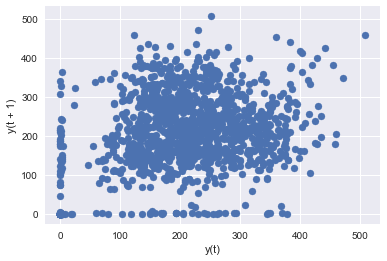

In [16]:
#Lag plot for time series data of total minutes

from pandas.plotting import lag_plot
lag_plot(min_active_total_date['Total_minutes'])
plt.show()

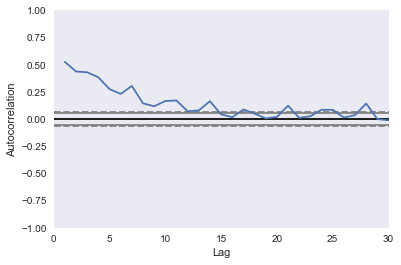

In [17]:
#Autocorrelation plot for total minutes data

from pandas.plotting import autocorrelation_plot
autocorrelation_plot(min_active_total_date['Total_minutes'])
plt.xlim(0,30)
plt.show()

In [18]:
#Get weight data into a DataFrame

In [19]:
weight_2014 = pd.DataFrame(fit_data_0['weight']['2014']['body-weight'])
weight_2014['dateTime'] = pd.to_datetime(weight_2014['dateTime'])
weight_2014.columns = ['date','weight']
weight_2015 = pd.DataFrame(fit_data_0['weight']['2015']['body-weight'])
weight_2015['dateTime'] = pd.to_datetime(weight_2015['dateTime'])
weight_2015.columns = ['date','weight']
weight_2016 = pd.DataFrame(fit_data_0['weight']['2016']['body-weight'])
weight_2016['dateTime'] = pd.to_datetime(weight_2016['dateTime'])
weight_2016.columns = ['date','weight']
weight_2017 = pd.DataFrame(fit_data_0['weight']['2017']['body-weight'])
weight_2017['dateTime'] = pd.to_datetime(weight_2017['dateTime'])
weight_2017.columns = ['date','weight']


In [20]:
df_weight = pd.concat([weight_2014,weight_2015,weight_2016,weight_2017])
df_weight['weight'] = df_weight['weight'].astype(float)
df_weight = df_weight.reset_index(drop=True)
df_weight_red = df_weight[:1440]
df_weight_red_date = df_weight_red.set_index('date')



In [21]:
#df_weight = pd.DataFrame()
#for key in fit_data_0['weight-log']:
#    data = pd.DataFrame(fit_data_0['weight-log'][key]['weight'])
#    df_weight = df_weight.append(data)

In [22]:
#df_weight['date']= pd.to_datetime(df_weight['date'])

In [23]:
#df_weight = df_weight.sort_values(by='date')
#df_weight = df_weight.drop_duplicates(subset='date', keep='last')
#df_weight = df_weight.reset_index(drop=True)

In [24]:
#df_weight_red = df_weight.loc[1:]
#df_weight_red = df_weight_red.reset_index(drop=True)
#df_weight_red_date = df_weight_red.set_index('date')
#df_weight_red_date = df_weight_red_date.drop(['fat','source'],axis=1)
#df_weight_red_date


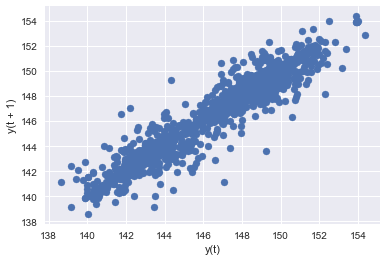

In [25]:
#Lag plot for weight data 

lag_plot(df_weight_red_date['weight'])
plt.show()

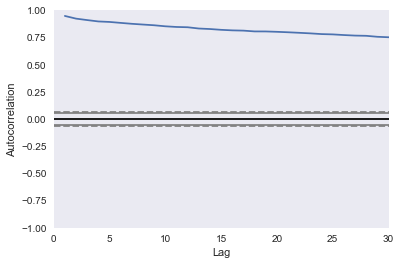

In [26]:
#Autocorrelation for weight data

from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_weight_red_date['weight'])
plt.xlim(0,30)
plt.show()

In [27]:
#Combine weight and activity data into one DataFrame

In [28]:
df_weight_active = pd.concat([df_weight_red_date,min_active_total_date],axis=1)
df_weight_active = df_weight_active.dropna()



In [32]:
#Calculate rolling averages for a 14 day period to smooth out the time series

df_weight_active['Rolling Avg Activity'] = df_weight_active['Total_minutes'].rolling(window=14).mean()
df_weight_active['Rolling Avg Weight'] = df_weight_active['weight'].rolling(window=14).mean()
#df_weight_active['Rolling Std Activity'] = df_weight_active['Total_minutes'].rolling(window=30).std()

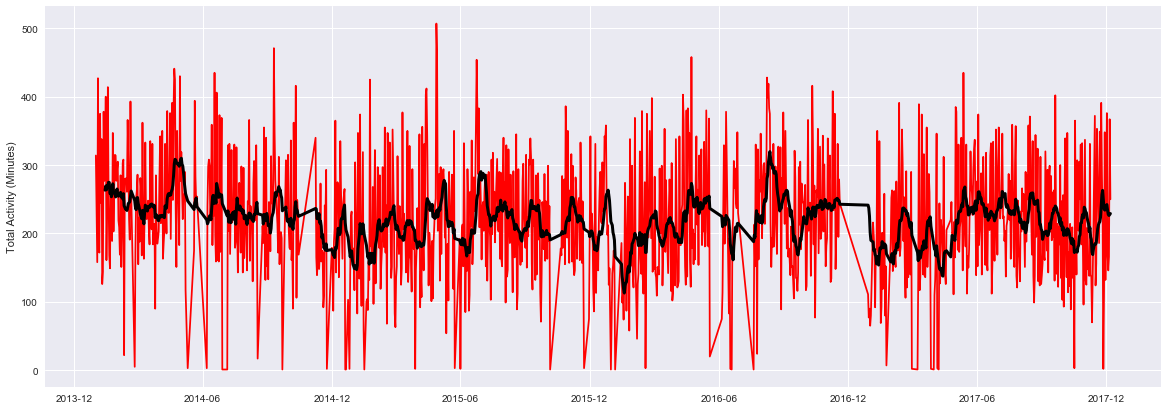

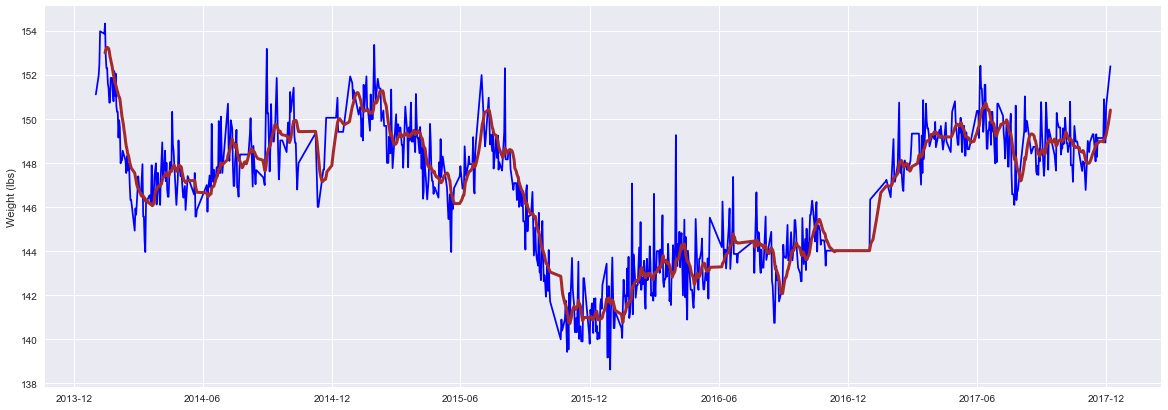

In [33]:
#Plots of data and the rolling averages

fig1, ax1 = plt.subplots(figsize=(20,7))
plot1 = ax1.plot(df_weight_active.index,df_weight_active['Total_minutes'],'r')
plot2 = ax1.plot(df_weight_active.index,df_weight_active['Rolling Avg Activity'], 'black',linewidth=3.0)
#plot2a = ax1.plot(df_weight_active.index,df_weight_active['Rolling Std Activity'], 'green',linewidth=3.0)
plt.ylabel('Total Activity (Minutes)')
fig2, ax2 = plt.subplots(figsize=(20,7))
plot3 = ax2.plot(df_weight_active.index,df_weight_active['weight'],'b')
plot4 = ax2.plot(df_weight_active.index,df_weight_active['Rolling Avg Weight'], 'brown',linewidth=3.0)
plt.ylabel('Weight (lbs)')


In [34]:
#Correlation between total activity and weight, with various time lags 

for i in range(-7,8,1):
    print('shift day:', i, df_weight_active['Rolling Avg Weight'].corr(df_weight_active['Rolling Avg Activity'].shift(i)))

shift day: -7 0.0885143110255
shift day: -6 0.0885460699796
shift day: -5 0.0880362389821
shift day: -4 0.0862422745314
shift day: -3 0.0836080139384
shift day: -2 0.0798615890365
shift day: -1 0.076217797659
shift day: 0 0.071725238745
shift day: 1 0.0641716072769
shift day: 2 0.056743705692
shift day: 3 0.0492737526818
shift day: 4 0.0418914448587
shift day: 5 0.0345893226432
shift day: 6 0.0270761916892
shift day: 7 0.0192836601312


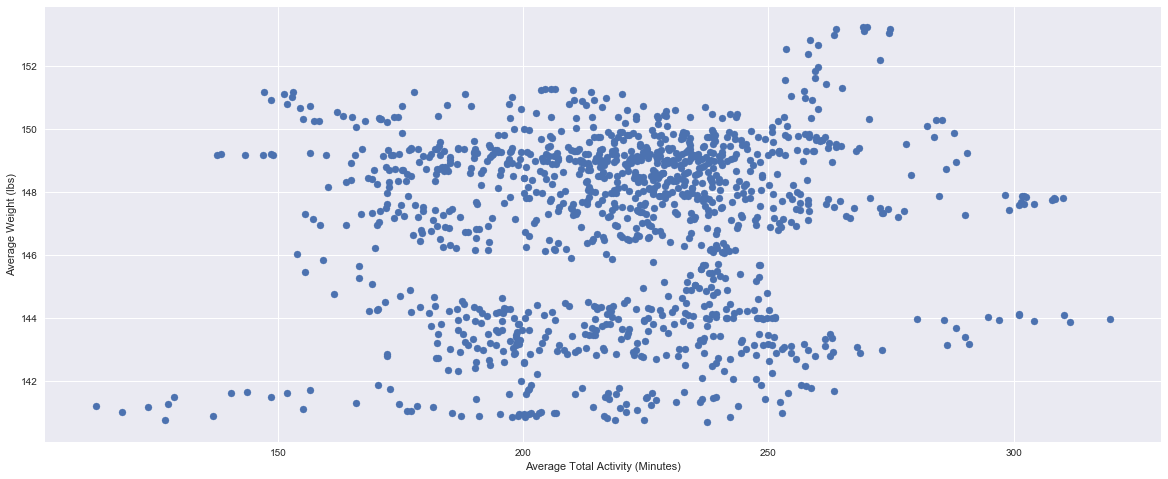

In [35]:
#Plot of Avg Weights versus Avg Activity.


plt.figure(2,figsize=(20,8))
plt.scatter(df_weight_active['Rolling Avg Activity'],df_weight_active['Rolling Avg Weight'])
plt.xlabel('Average Total Activity (Minutes)')
plt.ylabel('Average Weight (lbs)')
    

In [22]:
###Weight and Data about Calories ###########################################################

In [36]:
#Same procedure of taking data for calories and putting it together into a larger DataFrame 

In [37]:
tracker_cal_2014 = pd.DataFrame(fit_data_0['tracker-calories']['2014']['activities-tracker-calories'])
tracker_cal_2014['dateTime'] = pd.to_datetime(tracker_cal_2014['dateTime'])
tracker_cal_2014.columns = ['date','Tracker_Calories']
tracker_cal_2015 = pd.DataFrame(fit_data_0['tracker-calories']['2015']['activities-tracker-calories'])
tracker_cal_2015['dateTime'] = pd.to_datetime(tracker_cal_2015['dateTime'])
tracker_cal_2015.columns = ['date','Tracker_Calories']
tracker_cal_2016 = pd.DataFrame(fit_data_0['tracker-calories']['2016']['activities-tracker-calories'])
tracker_cal_2016['dateTime'] = pd.to_datetime(tracker_cal_2016['dateTime'])
tracker_cal_2016.columns = ['date','Tracker_Calories']
tracker_cal_2017 = pd.DataFrame(fit_data_0['tracker-calories']['2017']['activities-tracker-calories'])
tracker_cal_2017['dateTime'] = pd.to_datetime(tracker_cal_2017['dateTime'])
tracker_cal_2017.columns = ['date','Tracker_Calories']

In [38]:
tracker_calories = pd.concat([tracker_cal_2014,tracker_cal_2015,tracker_cal_2016,tracker_cal_2017])
tracker_calories['Tracker_Calories'] = tracker_calories['Tracker_Calories'].astype(int)
tracker_calories = tracker_calories.reset_index(drop=True)


In [39]:
tracker_act_cal_2014 = pd.DataFrame(fit_data_0['tracker-activity-calories']['2014']['activities-tracker-activityCalories'])
tracker_act_cal_2014['dateTime'] = pd.to_datetime(tracker_act_cal_2014['dateTime'])
tracker_act_cal_2014.columns = ['date','tracker_act_calories']
tracker_act_cal_2015 = pd.DataFrame(fit_data_0['tracker-activity-calories']['2015']['activities-tracker-activityCalories'])
tracker_act_cal_2015['dateTime'] = pd.to_datetime(tracker_act_cal_2015['dateTime'])
tracker_act_cal_2015.columns = ['date','tracker_act_calories']
tracker_act_cal_2016 = pd.DataFrame(fit_data_0['tracker-activity-calories']['2016']['activities-tracker-activityCalories'])
tracker_act_cal_2016['dateTime'] = pd.to_datetime(tracker_act_cal_2016['dateTime'])
tracker_act_cal_2016.columns = ['date','tracker_act_calories']
    
    
    
    

In [40]:
tracker_act_calories = pd.concat([tracker_act_cal_2014,tracker_act_cal_2015,tracker_act_cal_2016])
tracker_act_calories['tracker_act_calories'] = tracker_act_calories['tracker_act_calories'].astype(int)
tracker_act_calories = tracker_act_calories.reset_index(drop=True)
tracker_act_calories = tracker_act_calories.drop('date', axis=1)

In [44]:
#Combine data and Define new columns for a ratio of activity calories to total calories taken in

#Also excess calories = total - activity calories

total_calories = pd.concat([tracker_act_calories,tracker_calories],axis=1)
total_calories['Ratio'] = total_calories['tracker_act_calories']/total_calories['Tracker_Calories']
total_calories['Excess'] = total_calories['Tracker_Calories']-total_calories['tracker_act_calories']
total_calories_date = total_calories.set_index('date')


In [45]:
total_calories_weight = pd.concat([total_calories_date,df_weight_red_date], axis=1)


In [46]:
total_calories_weight = total_calories_weight.dropna()
total_calories_weight

,tracker_act_calories,Tracker_Calories,Ratio,Excess,weight
date,,,,,
2014-01-01,1036.0,1992,0.520080,956.0,151.12
2014-01-02,581.0,1601,0.362898,1020.0,151.34
2014-01-03,383.0,1473,0.260014,1090.0,151.57
2014-01-04,1586.0,2448,0.647876,862.0,151.80
2014-01-05,421.0,1491,0.282361,1070.0,151.98
2014-01-06,400.0,1477,0.270819,1077.0,152.50
2014-01-07,837.0,1747,0.479107,910.0,153.99
2014-01-08,718.0,1739,0.412881,1021.0,153.97
2014-01-09,1034.0,1994,0.518556,960.0,153.95


In [48]:
total_calories_weight['Rolling Avg Ratio'] = total_calories_weight['Ratio'].rolling(window=7).mean()
total_calories_weight['Rolling Avg Weight'] = total_calories_weight['weight'].rolling(window=7).mean()
#total_calories_weight['Rolling Std Ratio'] = total_calories_weight['Ratio'].rolling(window=30).std()

(735234.0, 736283.0)

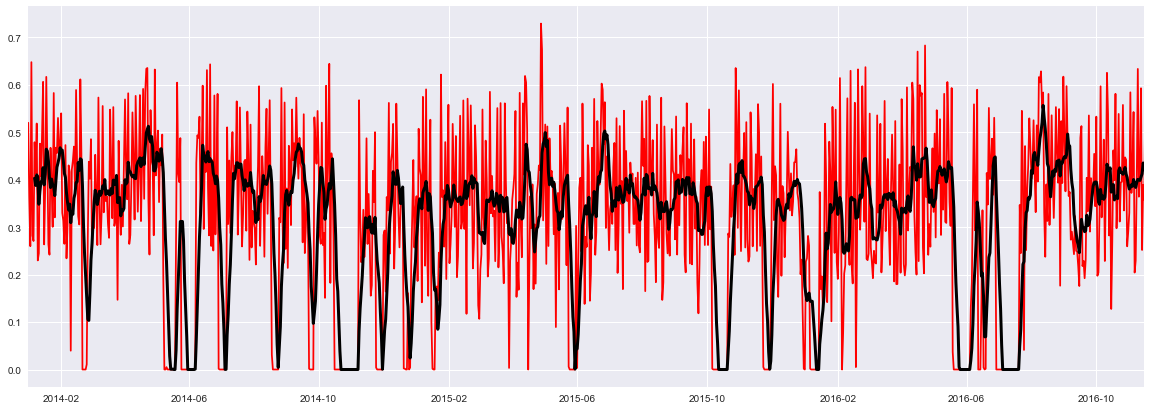

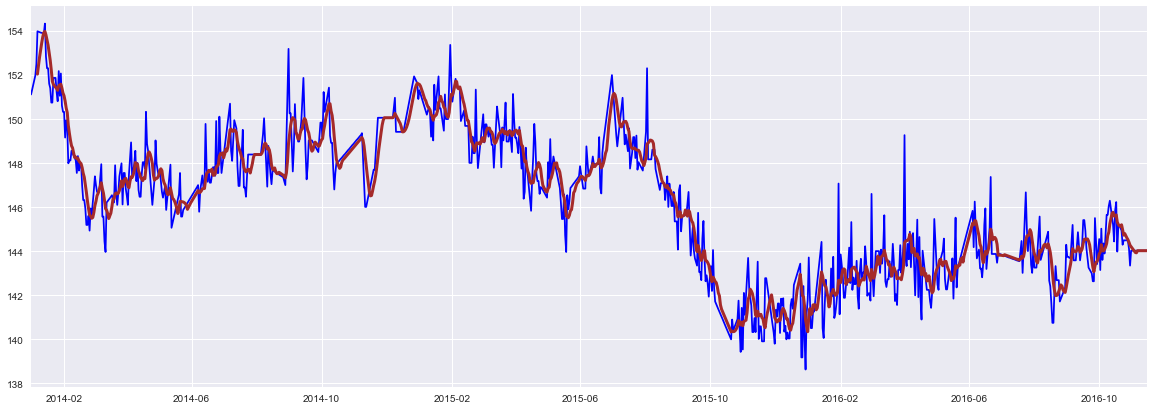

In [49]:
fig1, ax1 = plt.subplots(figsize=(20,7))
plot1 = ax1.plot(total_calories_weight.index,total_calories_weight['Ratio'],'r')
plot2 = ax1.plot(total_calories_weight.index,total_calories_weight['Rolling Avg Ratio'], 'black',linewidth=3.0)
#plot2a = ax1.plot(total_calories_weight.index,total_calories_weight['Rolling Std Ratio'], 'green',linewidth=3.0)
plt.xlim('01-01-2014','11-15-2016')
fig2, ax2 = plt.subplots(figsize=(20,7))
plot3 = ax2.plot(total_calories_weight.index,total_calories_weight['weight'],'b')
plot4 = ax2.plot(total_calories_weight.index,total_calories_weight['Rolling Avg Weight'], 'brown',linewidth=3.0)
plt.xlim('01-01-2014','11-15-2016')

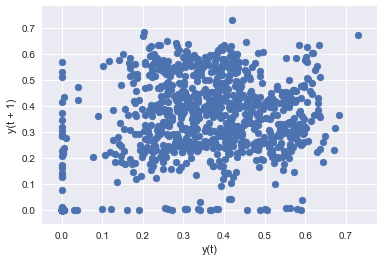

In [60]:
#Lag plot for calorie ratio

lag_plot(total_calories_weight['Ratio'])
plt.show()

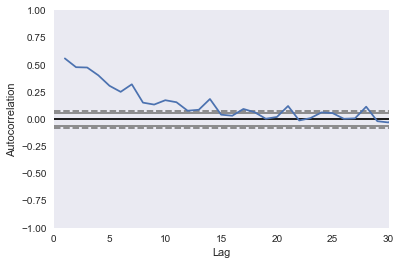

In [61]:
#Autocorrelation for Excess Calories 
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(total_calories_weight['Ratio'])
plt.xlim(0,30)
plt.show()

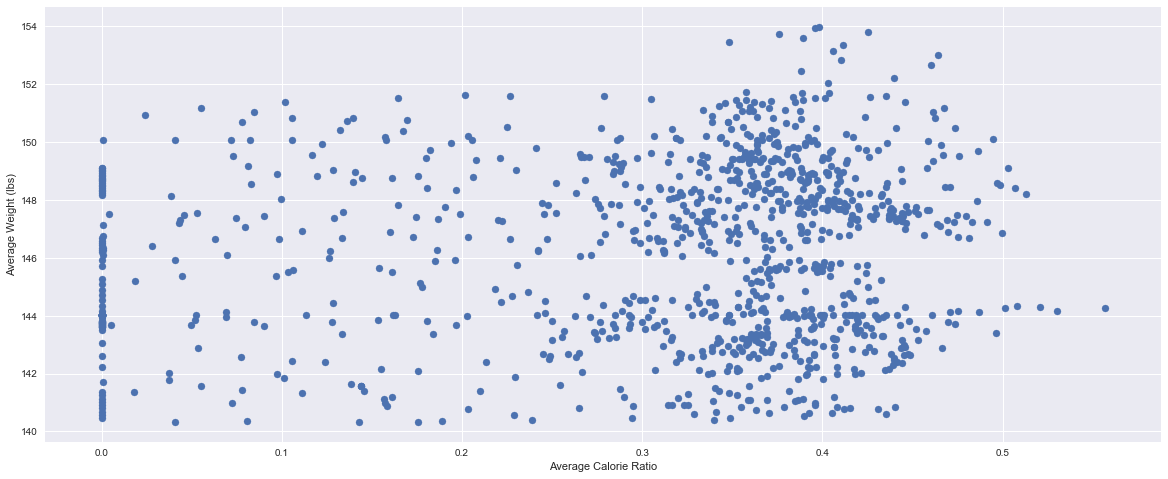

In [62]:
plt.figure(1,figsize=(20,8))
plt.xlabel('Average Calorie Ratio')
plt.ylabel('Average Weight (lbs)')
plt.scatter(total_calories_weight['Rolling Avg Ratio'],total_calories_weight['Rolling Avg Weight'])

In [ ]:
#Plots for Excess Calories together with Weight over Time 

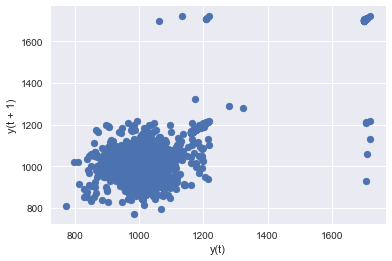

In [63]:
#Lag plot for Excess calories 

lag_plot(total_calories_weight['Excess'])
plt.show()

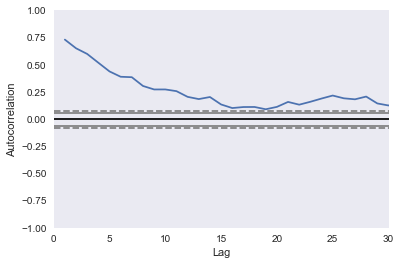

In [64]:
#Autocorrelation for Excess Calories 
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(total_calories_weight['Excess'])
plt.xlim(0,30)
plt.show()

In [100]:
total_calories_weight['Rolling Avg Excess'] = total_calories_weight['Excess'].rolling(window=14).mean()
total_calories_weight['Rolling Avg Weight'] = total_calories_weight['weight'].rolling(window=14).mean()

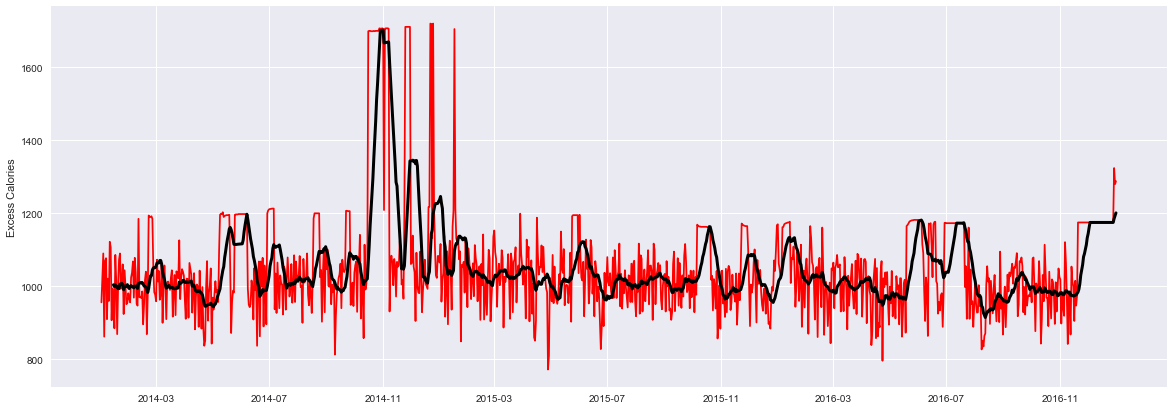

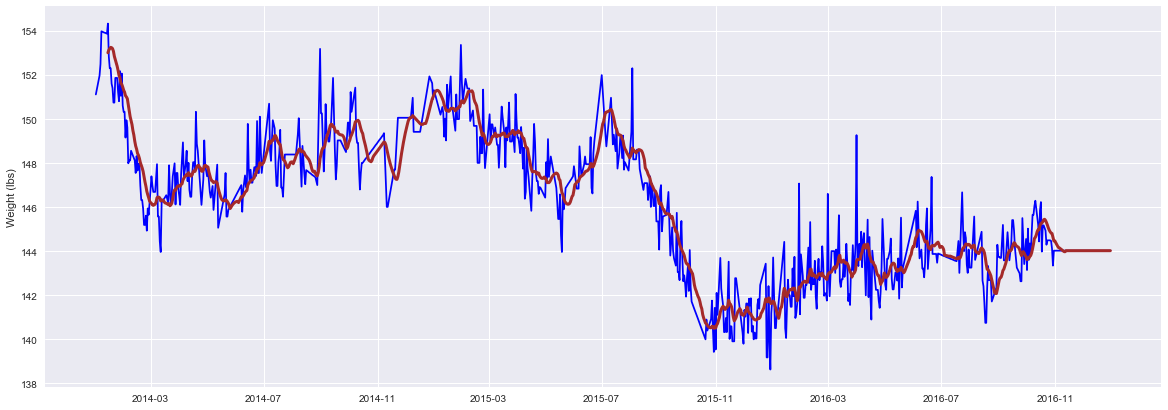

In [101]:
fig1, ax1 = plt.subplots(figsize=(20,7))
plot1 = ax1.plot(total_calories_weight.index,total_calories_weight['Excess'],'r')
plot2 = ax1.plot(total_calories_weight.index,total_calories_weight['Rolling Avg Excess'], 'black',linewidth=3.0)
plt.ylabel('Excess Calories')
fig2, ax2 = plt.subplots(figsize=(20,7))
plot3 = ax2.plot(total_calories_weight.index,total_calories_weight['weight'],'b')
plot4 = ax2.plot(total_calories_weight.index,total_calories_weight['Rolling Avg Weight'], 'brown',linewidth=3.0)
plt.ylabel('Weight (lbs)')

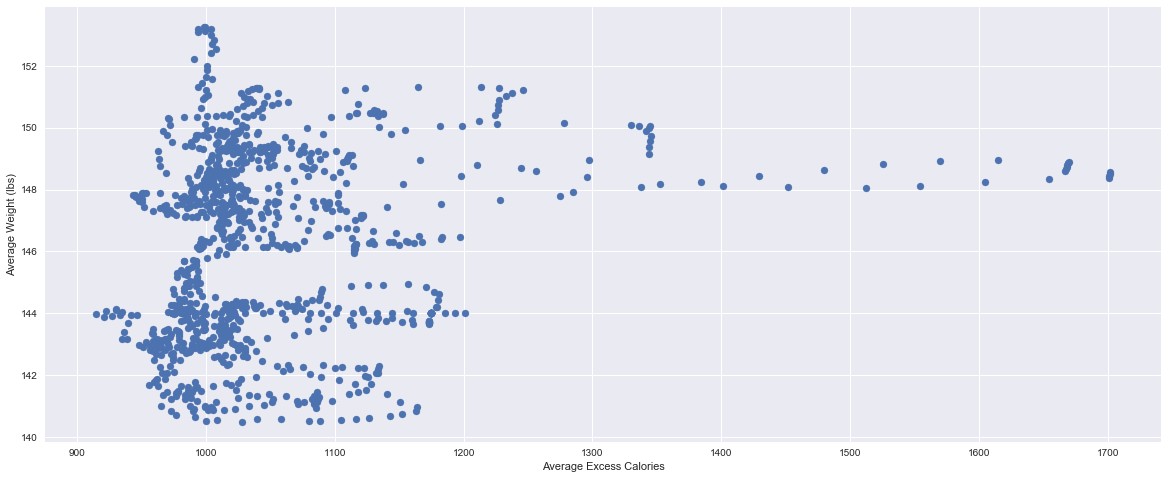

In [102]:
#Plot of Average Weight versus Excess Calories. Shows some correlation, stronger than the other variables 
#There are some outliers present to the right, probably bad data where activity calories were not recorded (middle of 2014)
#anything about 1300 seems suspicious....

plt.figure(1,figsize=(20,8))
plt.xlabel('Average Excess Calories')
plt.ylabel('Average Weight (lbs)')
plt.scatter(total_calories_weight['Rolling Avg Excess'],total_calories_weight['Rolling Avg Weight'])
#plt.xlim(800,1200)
plt.show()


In [80]:
for i in range(-7,8,1):
    print('shift day:', i, total_calories_weight['Rolling Avg Weight'].corr(total_calories_weight['Rolling Avg Excess'].shift(i)))

shift day: -7 0.14318082838
shift day: -6 0.144232948749
shift day: -5 0.146000914935
shift day: -4 0.148451484734
shift day: -3 0.151312937971
shift day: -2 0.154542346054
shift day: -1 0.157711764797
shift day: 0 0.160962206157
shift day: 1 0.166547706295
shift day: 2 0.171722836734
shift day: 3 0.176436898799
shift day: 4 0.180622719255
shift day: 5 0.18437248956
shift day: 6 0.187827225835
shift day: 7 0.191031321489


In [34]:
###Sleep minutes and Weight Data ###########################################################

In [35]:
sleep_min_2014 = pd.DataFrame(fit_data_0['sleep-minutes']['2014']['sleep-minutesAsleep'])
sleep_min_2014['dateTime'] = pd.to_datetime(sleep_min_2014['dateTime'])
sleep_min_2014.columns = ['date','Sleep_Minutes']
sleep_min_2015 = pd.DataFrame(fit_data_0['sleep-minutes']['2015']['sleep-minutesAsleep'])
sleep_min_2015['dateTime'] = pd.to_datetime(sleep_min_2015['dateTime'])
sleep_min_2015.columns = ['date','Sleep_Minutes']
sleep_min_2016 = pd.DataFrame(fit_data_0['sleep-minutes']['2016']['sleep-minutesAsleep'])
sleep_min_2016['dateTime'] = pd.to_datetime(sleep_min_2016['dateTime'])
sleep_min_2016.columns = ['date','Sleep_Minutes']
sleep_min_2017 = pd.DataFrame(fit_data_0['sleep-minutes']['2017']['sleep-minutesAsleep'])
sleep_min_2017['dateTime'] = pd.to_datetime(sleep_min_2017['dateTime'])
sleep_min_2017.columns = ['date','Sleep_Minutes']

In [36]:
sleep_min_total = pd.concat([sleep_min_2014,sleep_min_2015,sleep_min_2016,sleep_min_2017])
sleep_min_total = sleep_min_total.reset_index(drop=True)
sleep_min_total_red = sleep_min_total[:123]
sleep_min_total_red_date = sleep_min_total_red.set_index('date')

In [37]:
df_weight_sleep = pd.concat([sleep_min_total_red_date,df_weight_red_date],axis=1)
df_weight_sleep = df_weight_sleep.dropna()

In [38]:
df_weight_sleep['Rolling Avg Sleep'] = df_weight_sleep['Sleep_Minutes'].rolling(window=7).mean()
df_weight_sleep['Rolling Avg Weight'] = df_weight_sleep['weight'].rolling(window=7).mean()

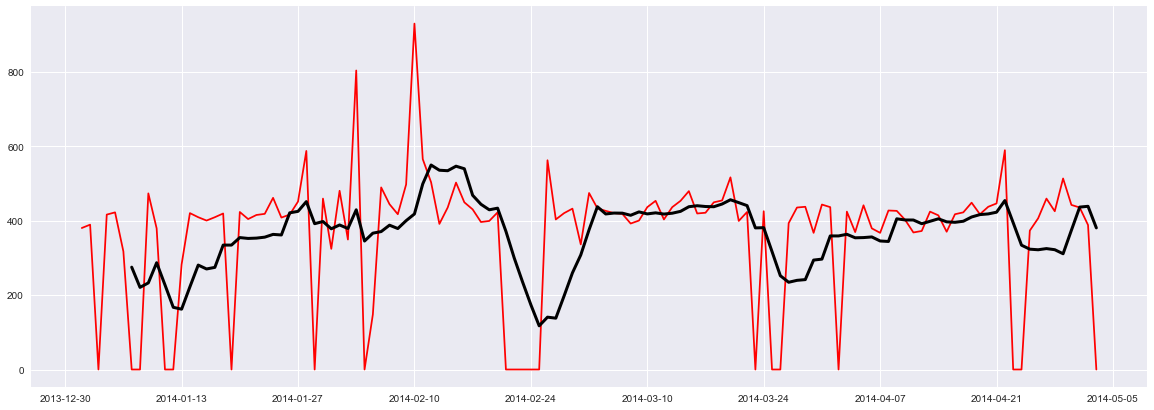

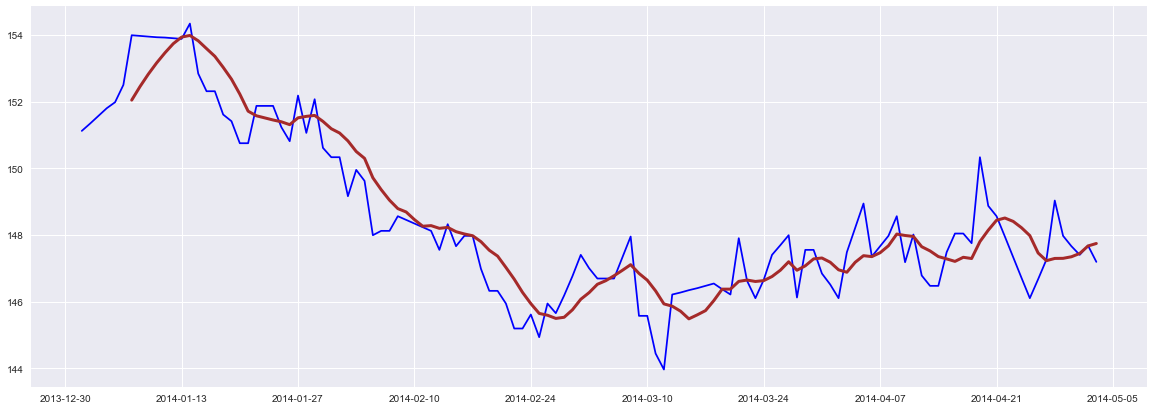

In [39]:
fig1, ax1 = plt.subplots(figsize=(20,7))
plot1 = ax1.plot(df_weight_sleep.index,df_weight_sleep['Sleep_Minutes'],'r')
plot2 = ax1.plot(df_weight_sleep.index,df_weight_sleep['Rolling Avg Sleep'], 'black',linewidth=3.0)
#plt.ylim(0,350)
fig2, ax2 = plt.subplots(figsize=(20,7))
plot3 = ax2.plot(df_weight_sleep.index,df_weight_sleep['weight'],'b')
plot4 = ax2.plot(df_weight_sleep.index,df_weight_sleep['Rolling Avg Weight'], 'brown',linewidth=3.0)

In [40]:
sleep_eff_2014 = pd.DataFrame(fit_data_0['sleep-efficiency']['2014']['sleep-efficiency'])
sleep_eff_2014['dateTime'] = pd.to_datetime(sleep_eff_2014['dateTime'])
sleep_eff_2014.columns = ['date','sleep_eff']

In [41]:
sleep_eff_total = sleep_eff_2014[:123]
sleep_eff_total = sleep_eff_total.set_index('date')

In [42]:
df_weight_sleep_eff = pd.concat([sleep_eff_total,df_weight_red_date],axis=1)
df_weight_sleep_eff = df_weight_sleep_eff.dropna()

In [43]:
df_weight_sleep_eff['Rolling Avg Sleep Eff'] = df_weight_sleep_eff['sleep_eff'].rolling(window=7).mean()
df_weight_sleep_eff['Rolling Avg Weight'] = df_weight_sleep_eff['weight'].rolling(window=7).mean()

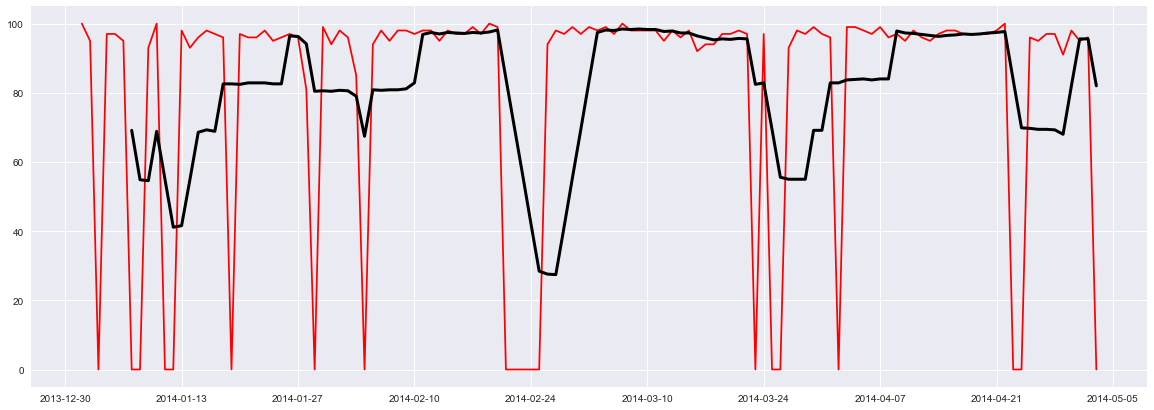

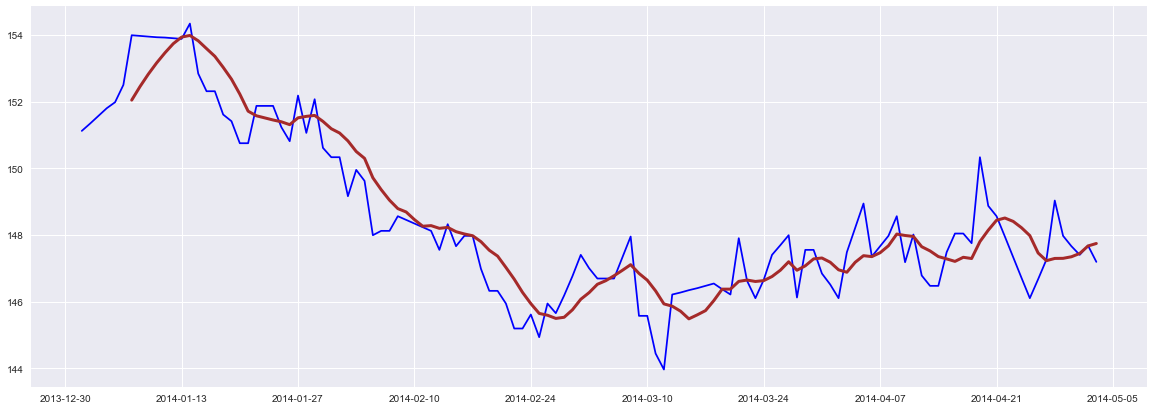

In [44]:
fig1, ax1 = plt.subplots(figsize=(20,7))
plot1 = ax1.plot(df_weight_sleep_eff.index,df_weight_sleep_eff['sleep_eff'],'r')
plot2 = ax1.plot(df_weight_sleep_eff.index,df_weight_sleep_eff['Rolling Avg Sleep Eff'], 'black',linewidth=3.0)
#plt.ylim(0,350)
fig2, ax2 = plt.subplots(figsize=(20,7))
plot3 = ax2.plot(df_weight_sleep_eff.index,df_weight_sleep_eff['weight'],'b')
plot4 = ax2.plot(df_weight_sleep_eff.index,df_weight_sleep_eff['Rolling Avg Weight'], 'brown',linewidth=3.0)

In [ ]:
#####################OLD MATERIAL ################################################################################

In [ ]:

sum_list = []
sum_min = min_active_total_red.iloc[0]['Total_minutes']
for i in range(1,len(min_active_total_red)):
    if i%7 != 0:
        sum_min += min_active_total_red.iloc[i]['Total_minutes']
    else: 
        sum_list.append(sum_min)
        sum_min = min_active_total_red.iloc[i]['Total_minutes']


In [ ]:
index_list = list(range(7,7*len(sum_list)+1,7))
df_sum = pd.DataFrame(list(zip(index_list,sum_list)),columns=['Day','Weekly_sum'])
df_sum = df_sum.set_index('Day')

In [ ]:
df_weight_sum = pd.concat([df_sum,df_weight_red],axis=1)
df_weight_sum = df_weight_sum.dropna()

In [21]:
df_weight_fat = df_weight['fat'].dropna()


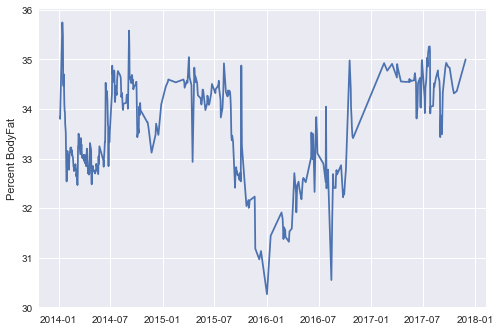

In [22]:
plt.plot(df_weight_fat.index,df_weight_fat)
plt.ylabel('Percent BodyFat')
plt.show()

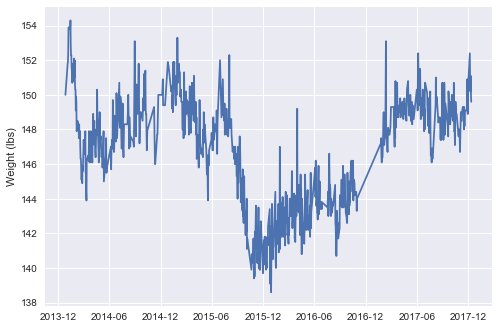

In [58]:
plt.plot(df_weight.index,df_weight['weight'])
plt.ylabel('Weight (lbs)')
#plt.xlim('2015-05-01', '2015-12-10')
plt.show()

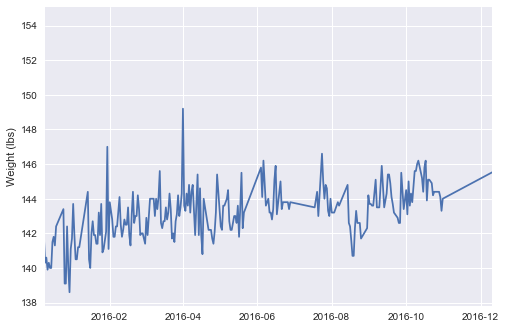

In [24]:
plt.plot(df_weight.index,df_weight['weight'])
plt.ylabel('Weight (lbs)')
plt.xlim('2015-12-10', '2016-12-10')
plt.show()

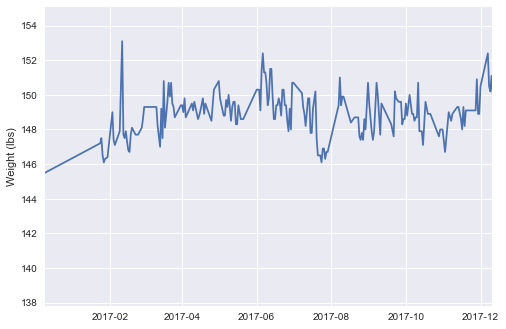

In [25]:
plt.plot(df_weight.index,df_weight['weight'])
plt.ylabel('Weight (lbs)')
plt.xlim('2016-12-10', '2017-12-10')
plt.show()

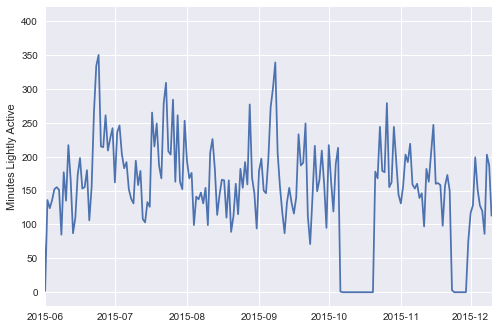

In [26]:
plt.plot(min_light_active.index,min_light_active['light_minutes'])
plt.xlim('2015-06-01', '2015-12-10')
plt.ylabel('Minutes Lightly Active')
plt.show()

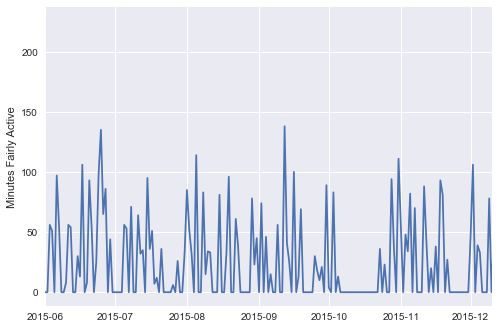

In [27]:
plt.plot(min_fairly_active.index,min_fairly_active['fair_minutes'])
plt.xlim('2015-06-01', '2015-12-10')
plt.ylabel('Minutes Fairly Active')
plt.show()

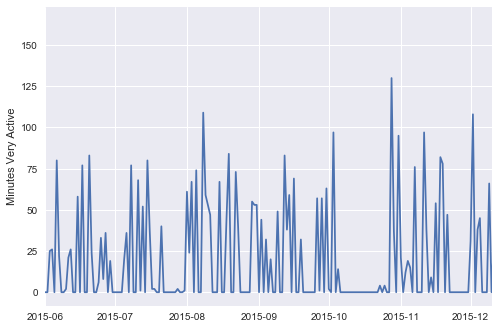

In [28]:
plt.plot(min_very_active.index,min_very_active['very_minutes'])
plt.ylabel('Minutes Very Active')
plt.xlim('2015-06-01', '2015-12-10')
plt.show()

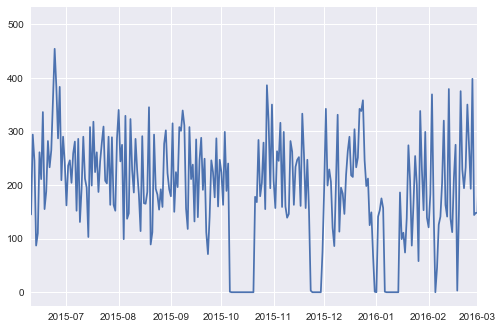

In [30]:
plt.plot(min_active_total.index,min_active_total['Total_minutes'])
plt.xlim('2015-06-10', '2016-03-01')
plt.show()

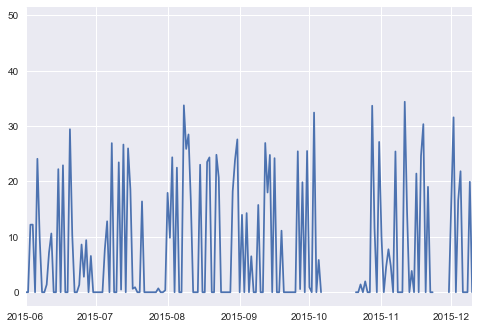

In [31]:
plt.plot(min_active_total.index,min_active_total['Percent Very Active'])
plt.xlim('2015-06-01', '2015-12-10')
plt.show()

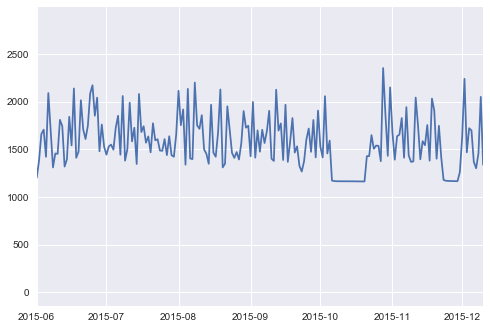

In [32]:
plt.plot(tracker_calories['date'],tracker_calories['Tracker_Calories'])
plt.xlim('2015-06-01', '2015-12-10')
plt.show()

In [33]:
min_active_total['Active_Day'] = min_active_total['Total_minutes'].map(lambda minute : 1 if minute >= 75 else 0)
min_active_total

,light_minutes,fair_minutes,very_minutes,Total_minutes,Percent Very Active,Active_Day
date,,,,,,
2014-01-01,165,94,55,314,17.515924,1
2014-01-02,199,38,3,240,1.250000,1
2014-01-03,122,35,1,158,0.632911,1
2014-01-04,188,134,105,427,24.590164,1
2014-01-05,150,25,3,178,1.685393,1
2014-01-06,147,25,0,172,0.000000,1
2014-01-07,345,29,1,375,0.266667,1
2014-01-08,143,89,13,245,5.306122,1
2014-01-09,187,123,28,338,8.284024,1


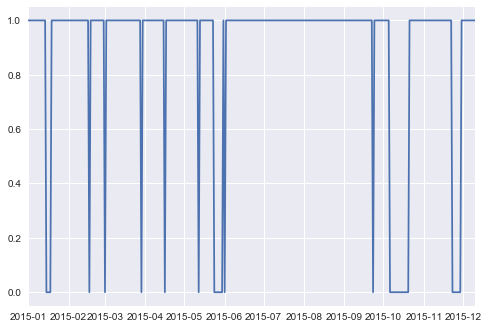

In [34]:
plt.plot(min_active_total.index,min_active_total['Active_Day'])
plt.xlim('2015-01-01', '2015-12-10')
plt.show()

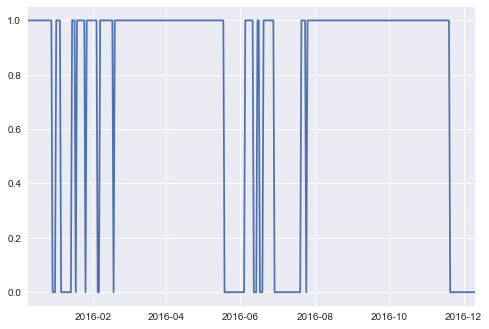

In [35]:
plt.plot(min_active_total.index,min_active_total['Active_Day'])
plt.xlim('2015-12-10', '2016-12-10')
plt.show()

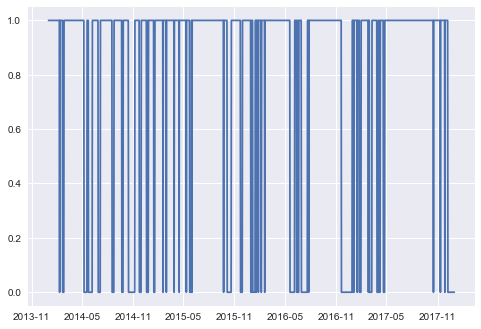

In [36]:
plt.plot(min_active_total.index,min_active_total['Active_Day'])

plt.show()

In [37]:
active_arr = np.array(min_active_total['Active_Day'])
active_arr

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [38]:
counts = []
count = 1
for i in range(len(active_arr)-1):
    if active_arr[i] == 1 and active_arr[i+1] == 1:
        count += 1
    elif active_arr[i] == 1 and active_arr[i+1] == 0:
        counts.append(count)
        count = 0
    elif active_arr[i] == 0 and active_arr[i+1] == 1:
        count = 1

        
 

In [39]:
counts

[40,
 10,
 72,
 5,
 21,
 42,
 28,
 19,
 16,
 19,
 1,
 19,
 29,
 11,
 27,
 17,
 25,
 11,
 1,
 113,
 12,
 33,
 30,
 4,
 3,
 7,
 9,
 11,
 90,
 7,
 2,
 9,
 4,
 117,
 3,
 1,
 11,
 7,
 26,
 3,
 18,
 4,
 11,
 175,
 24,
 15,
 10]

In [40]:
tracker_steps_2014 = pd.DataFrame(fit_data_0['tracker-steps']['2014']['activities-tracker-steps'])
tracker_steps_2014['dateTime'] = pd.to_datetime(tracker_steps_2014['dateTime'])
tracker_steps_2014.columns = ['date','tracker-steps']
tracker_steps_2015 = pd.DataFrame(fit_data_0['tracker-steps']['2015']['activities-tracker-steps'])
tracker_steps_2015['dateTime'] = pd.to_datetime(tracker_steps_2015['dateTime'])
tracker_steps_2015.columns = ['date','tracker-steps']
tracker_steps_2016 = pd.DataFrame(fit_data_0['tracker-steps']['2016']['activities-tracker-steps'])
tracker_steps_2016['dateTime'] = pd.to_datetime(tracker_steps_2016['dateTime'])
tracker_steps_2016.columns = ['date','tracker-steps']
tracker_steps_2017 = pd.DataFrame(fit_data_0['tracker-steps']['2017']['activities-tracker-steps'])
tracker_steps_2017['dateTime'] = pd.to_datetime(tracker_steps_2017['dateTime'])
tracker_steps_2017.columns = ['date','tracker-steps']

In [41]:
tracker_steps = pd.concat([tracker_steps_2014,tracker_steps_2015,tracker_steps_2016,tracker_steps_2017])
tracker_steps['tracker-steps'] = tracker_steps['tracker-steps'].astype(int)
tracker_steps = tracker_steps.set_index('date')

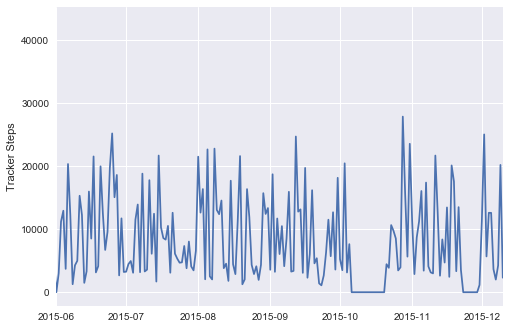

In [42]:
plt.plot(tracker_steps.index,tracker_steps['tracker-steps'])
plt.xlim('2015-06-01', '2015-12-10')
plt.ylabel('Tracker Steps')
plt.show()

In [43]:
tracker_floors_2014 = pd.DataFrame(fit_data_0['tracker-floors']['2014']['activities-tracker-floors'])
tracker_floors_2014['dateTime'] = pd.to_datetime(tracker_floors_2014['dateTime'])
tracker_floors_2014.columns = ['date','tracker-floors']
tracker_floors_2015 = pd.DataFrame(fit_data_0['tracker-floors']['2015']['activities-tracker-floors'])
tracker_floors_2015['dateTime'] = pd.to_datetime(tracker_floors_2015['dateTime'])
tracker_floors_2015.columns = ['date','tracker-floors']
tracker_floors_2016 = pd.DataFrame(fit_data_0['tracker-floors']['2016']['activities-tracker-floors'])
tracker_floors_2016['dateTime'] = pd.to_datetime(tracker_floors_2016['dateTime'])
tracker_floors_2016.columns = ['date','tracker-floors']
tracker_floors_2017 = pd.DataFrame(fit_data_0['tracker-floors']['2017']['activities-tracker-floors'])
tracker_floors_2017['dateTime'] = pd.to_datetime(tracker_floors_2017['dateTime'])
tracker_floors_2017.columns = ['date','tracker-floors']

In [44]:
tracker_floors = pd.concat([tracker_floors_2014,tracker_floors_2015,tracker_floors_2016,tracker_floors_2017])
tracker_floors['tracker-floors'] = tracker_floors['tracker-floors'].astype(int)
tracker_floors = tracker_floors.set_index('date')

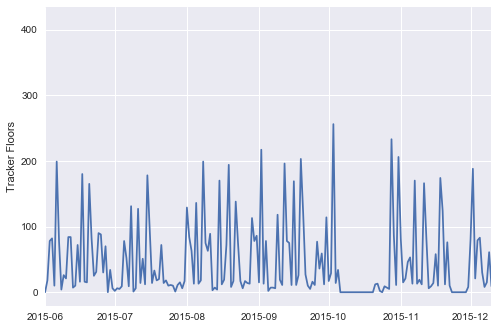

In [45]:
plt.plot(tracker_floors.index,tracker_floors['tracker-floors'])
plt.xlim('2015-06-01', '2015-12-10')
plt.ylabel('Tracker Floors')
plt.show()

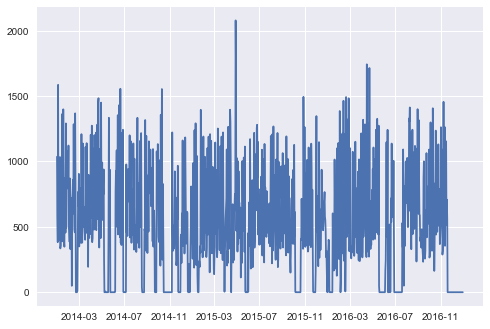

In [48]:
plt.plot(tracker_act_calories['date'],tracker_act_calories['tracker_act_calories'])
plt.show()

In [51]:
tracker_act_calories = tracker_act_calories.set_index('date')
tracker_calories = tracker_calories.set_index('date')

In [52]:
tracker_cal_tot = pd.concat([tracker_calories,tracker_act_calories], axis=1)

In [55]:
tracker_cal_tot['ratio'] = (tracker_cal_tot['tracker_act_calories']/tracker_cal_tot['Tracker_Calories'])*100


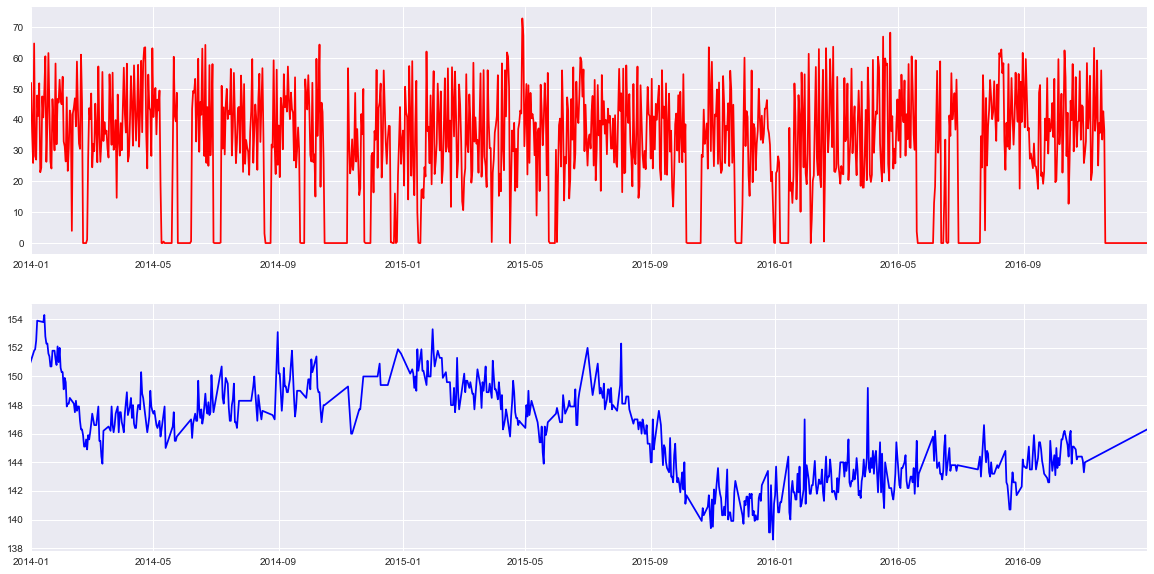

In [69]:
plt.figure(1, figsize=(20,10))
plt.subplot(211)
plt.plot(tracker_cal_tot.index,tracker_cal_tot['ratio'],'r')
plt.xlim('01-01-2014', '12-31-2016')
plt.subplot(212)
plt.plot(df_weight.index,df_weight['weight'], 'b')
plt.xlim('01-01-2014', '12-31-2016')
plt.show()

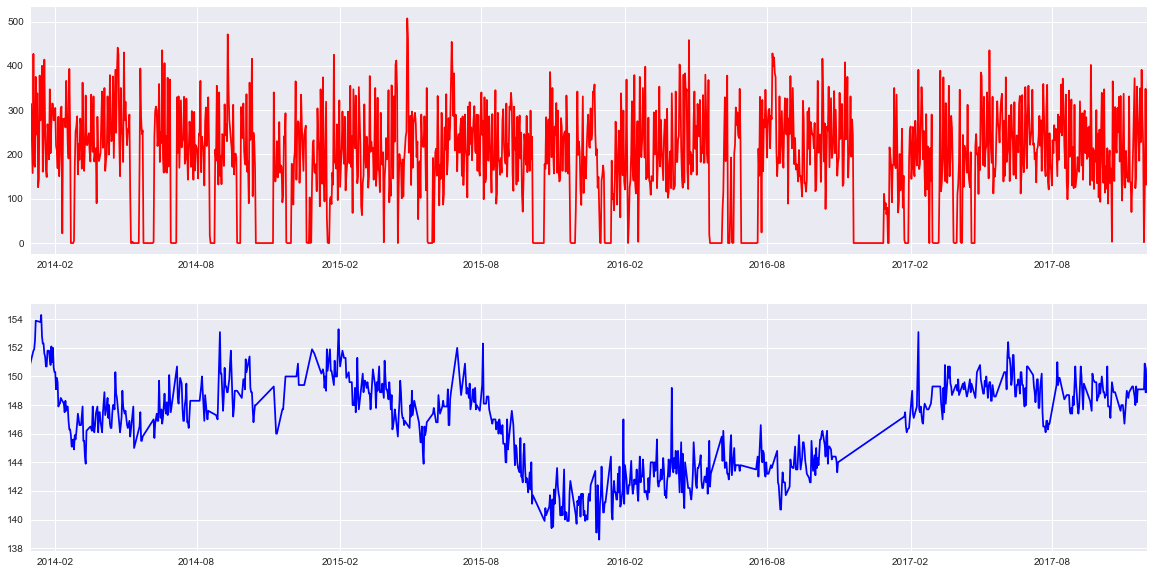

In [73]:
plt.figure(2, figsize=(20,10))
plt.subplot(211)
plt.plot(min_active_total.index,min_active_total['Total_minutes'],'r')
plt.xlim('01-01-2014', '12-01-2017')
plt.subplot(212)
plt.plot(df_weight.index,df_weight['weight'], 'b')
plt.xlim('01-01-2014', '12-01-2017')
plt.show()
